In [5]:
import pandas as pd  # import pandas
from datetime import datetime  # get the date
import matplotlib.pyplot as plt  # plot stuff
import scipy.stats as sts  # stats package
import seaborn as sns  # nicer plots

hospitals = pd.read_csv("CaliforniaHospitalData.csv")  # read hospital file
personnel = pd.read_csv("CaliforniaHospitalData_Personnel.txt", sep="\t")  # read personnel file

print("hospital file:", hospitals.head())  # quick check
print("personnel file:", personnel.head())  # quick check

hospital file:    HospitalID                              Name         Zip  \
0       45740                  Mammoth Hospital  93546-0660   
1       12145  Victor Valley Community Hospital       92392   
2       25667        Pioneers Memorial Hospital       92227   
3       46996      Ridgecrest Regional Hospital       93555   
4       37393        Barstow Community Hospital       92311   

                   Website TypeControl     Teaching DonorType  NoFTE  \
0  www.mammothhospital.com    District  Small/Rural   Charity  327.0   
1             www.vvch.org  Non Profit  Small/Rural   Charity  345.0   
2             www.pmhd.org    District  Small/Rural   Charity  601.2   
3              www.rrh.org  Non Profit  Small/Rural   Charity  400.0   
4  www.barstowhospital.com    Investor  Small/Rural   Charity  262.0   

     NetPatRev    InOperExp   OutOperExp   OperRev   OperInc  AvlBeds  
0  135520.2186  20523425.53  34916220.47  49933713  -5505933       15  
1  136156.6913  33447542.78  

In [7]:
merged = pd.merge(hospitals, personnel, on="HospitalID")  # combine them together
merged.drop(columns=["Work_ID", "PositionID", "Website"], inplace=True)  # take out and clean what we dont need

new_row = {  # my row!
    "HospitalID": merged.iloc[0]["HospitalID"],  # first id
    "LastName": "Dorband",  # my last name
    "FirstName": "Jessica",  # me
    "Gender": "F",  # im female
    "PositionTitle": "Regional Representative",  # my job
    "Compensation": 46978,  # what i get paid
    "MaxTerm": 4,  # years max
    "StartDate": datetime.today().strftime("%m/%d/%Y")  # today
}

merged = pd.concat([merged, pd.DataFrame([new_row])], ignore_index=True)  # add it to the file
print("Show the last rows:", merged.tail())  # see if it worked

Show the last rows:     HospitalID                                               Name    Zip  \
57       31032   Long Beach Memorial & Miller Children's Hospital  90806   
58       22460                        Stanford Hospital & Clinics  94305   
59       33192  California Pacific Medical Center - Pacific Ca...  94115   
60       38900                        Cedars-Sinai Medical Center  90048   
61       45740                                                NaN    NaN   

   TypeControl  Teaching DonorType   NoFTE    NetPatRev     InOperExp  \
57  Non Profit  Teaching    Alumni  5218.0  1187021.872  2.912481e+08   
58  Non Profit  Teaching    Alumni  6392.0  4333934.423  9.289621e+08   
59  Non Profit  Teaching    Alumni  1565.1  2736281.415  6.337903e+08   
60  Non Profit  Teaching    Alumni  8000.0  4662581.617  1.285631e+09   
61         NaN       NaN       NaN     NaN          NaN           NaN   

     OutOperExp  ...  AvlBeds  LastName  FirstName Gender  \
57  109328611.1  ...   

In [9]:
merged["StartDate"] = pd.to_datetime(merged["StartDate"])  # change to date
cat_columns = ["TypeControl", "Teaching", "DonorType", "Gender"]  # which ones
for col in cat_columns:  # go through them
    merged[col] = merged[col].astype("category")  # change type

print("show data types:", merged.dtypes)  # show types


show data types: HospitalID                int64
Name                     object
Zip                      object
TypeControl            category
Teaching               category
DonorType              category
NoFTE                   float64
NetPatRev               float64
InOperExp               float64
OutOperExp              float64
OperRev                 float64
OperInc                 float64
AvlBeds                 float64
LastName                 object
FirstName                object
Gender                 category
PositionTitle            object
Compensation              int64
MaxTerm                   int64
StartDate        datetime64[ns]
Phone                    object
Email                    object
dtype: object


In [11]:
numeric_summary = merged.describe()  # get numbers numeric columns
print("number summary:", numeric_summary)  # check

manual_summary = merged.select_dtypes(include='number').agg(["mean", "median", "min", "max"])  # mean, median, min, max
print("manual stats:", manual_summary)  # check

number summary:          HospitalID        NoFTE     NetPatRev     InOperExp    OutOperExp  \
count     62.000000    61.000000  6.100000e+01  6.100000e+01  6.100000e+01   
mean   32052.838710  1350.264262  6.695836e+05  1.662706e+08  9.015808e+07   
min    10767.000000    55.000000  1.417224e+04  1.436471e+06  3.787718e+06   
25%    21335.000000   215.500000  6.579243e+04  1.368450e+07  1.426128e+07   
50%    33267.000000   374.320000  1.723989e+05  3.184268e+07  3.491622e+07   
75%    39108.000000  1216.000000  5.409751e+05  1.737450e+08  9.306671e+07   
max    46996.000000  8000.000000  4.662582e+06  1.285631e+09  6.621559e+08   
std    11065.265699  2025.285385  1.097513e+06  2.827876e+08  1.372897e+08   

            OperRev       OperInc     AvlBeds   Compensation    MaxTerm  \
count  6.100000e+01  6.100000e+01   61.000000      62.000000  62.000000   
mean   2.562733e+08 -1.553491e+05  194.524590   92036.064516   4.241935   
min    5.235317e+06 -3.211633e+08   12.000000   23987.00

In [13]:
text_summary = merged.select_dtypes(include='object').describe()  # text (object) columns
print("text info:", text_summary)  # check

cat_summary = merged.select_dtypes(include='category').describe()  # sum categorical columns
print("categories info:", cat_summary)  # check

text info:                     Name         Zip LastName FirstName  \
count                 61          61       62        62   
unique                61          61       24        20   
top     Mammoth Hospital  93546-0660    Smith     David   
freq                   1           1        4         6   

                  PositionTitle         Phone                      Email  
count                        62            61                         61  
unique                        4            24                         24  
top     Regional Representative  785-532-2452  david.web@comenitymed.com  
freq                         25             3                          3  
categories info:        TypeControl     Teaching DonorType Gender
count           61           61        61     62
unique           4            2         2      2
top     Non Profit  Small/Rural   Charity      F
freq            37           44        44     33


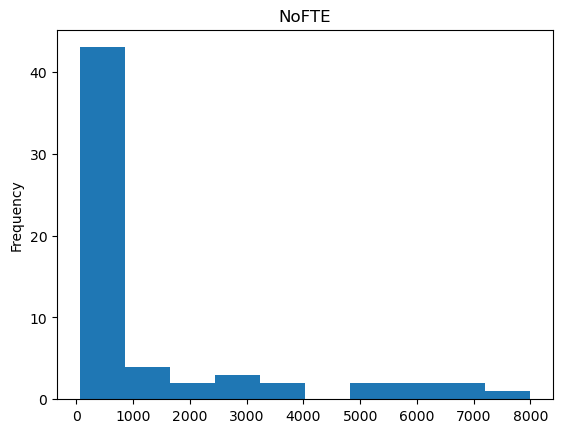

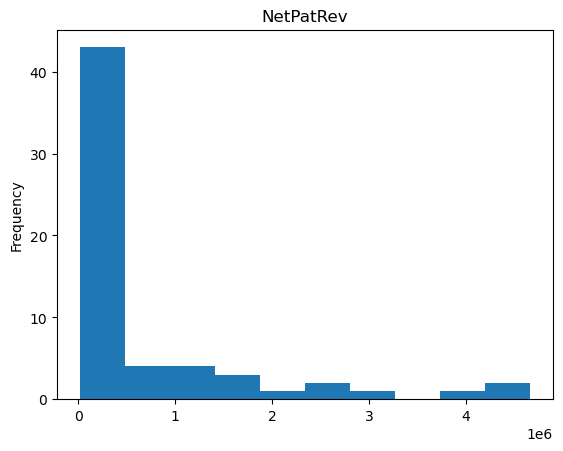

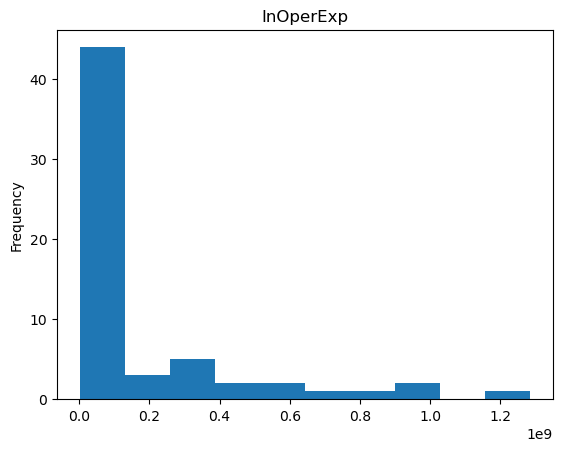

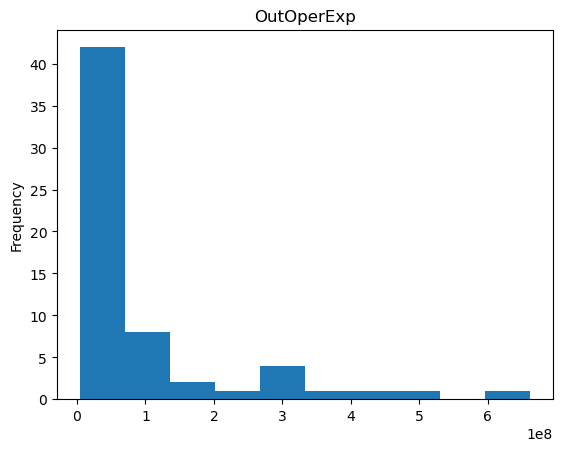

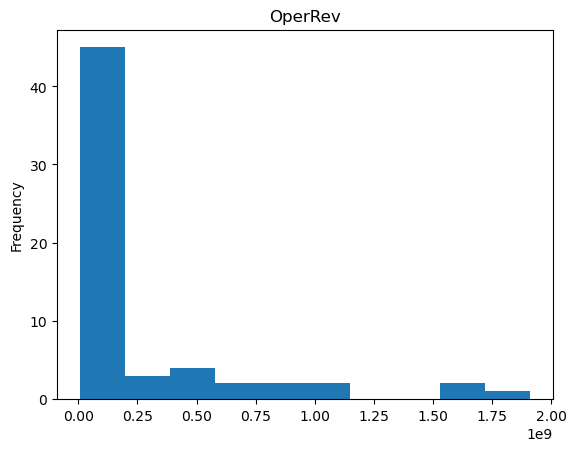

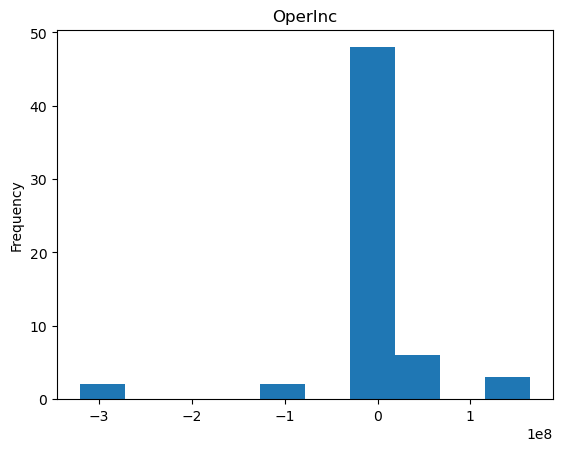

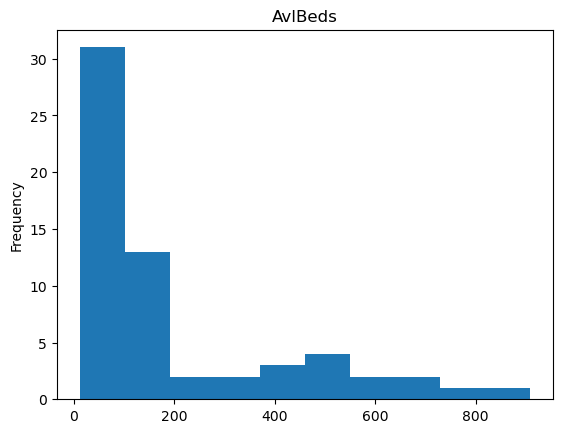

In [16]:
# histograms for the numeric vars
merged['NoFTE'].plot.hist(title='NoFTE')  # histogram for NoFTE
plt.show()  # show plot
merged['NetPatRev'].plot.hist(title='NetPatRev')  # histogram for NetPatRev
plt.show()  # show plot
merged['InOperExp'].plot.hist(title='InOperExp')  # histogram for InOperExp
plt.show()  # show plot
merged['OutOperExp'].plot.hist(title='OutOperExp')  # histogram for OutOperExp
plt.show()  # show plot
merged['OperRev'].plot.hist(title='OperRev')  # histogram for OperRev
plt.show()  # show plot
merged['OperInc'].plot.hist(title='OperInc')  # histogram for OperInc
plt.show()  # show plot
merged['AvlBeds'].plot.hist(title='AvlBeds')  # histogram for AvlBeds
plt.show()  # show plot

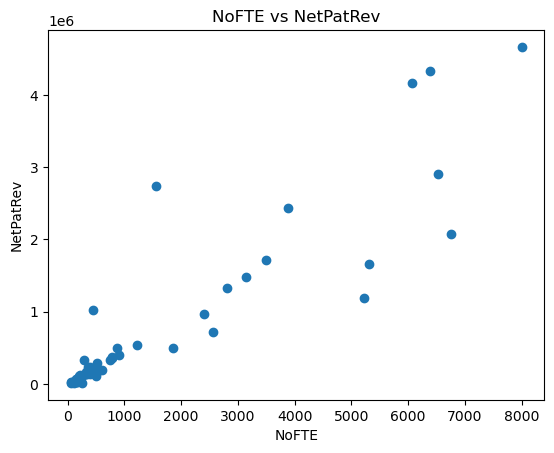

In [18]:
# scatterplots with NetPatRev as y
plt.scatter(merged['NoFTE'], merged['NetPatRev'])  # scatter
plt.title('NoFTE vs NetPatRev')  # title
plt.xlabel('NoFTE')  # x label
plt.ylabel('NetPatRev')  # y label
plt.show()  # show

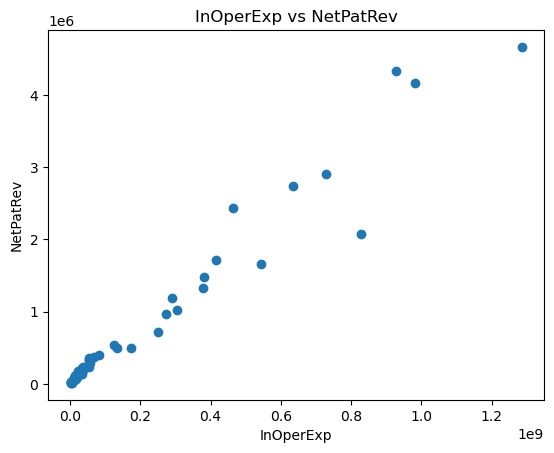

In [20]:
plt.scatter(merged['InOperExp'], merged['NetPatRev'])  # scatter
plt.title('InOperExp vs NetPatRev')
plt.xlabel('InOperExp')
plt.ylabel('NetPatRev')
plt.show()

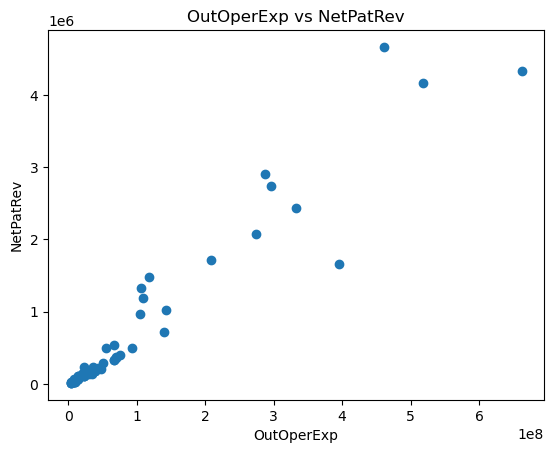

In [22]:
plt.scatter(merged['OutOperExp'], merged['NetPatRev'])
plt.title('OutOperExp vs NetPatRev')
plt.xlabel('OutOperExp')
plt.ylabel('NetPatRev')
plt.show()

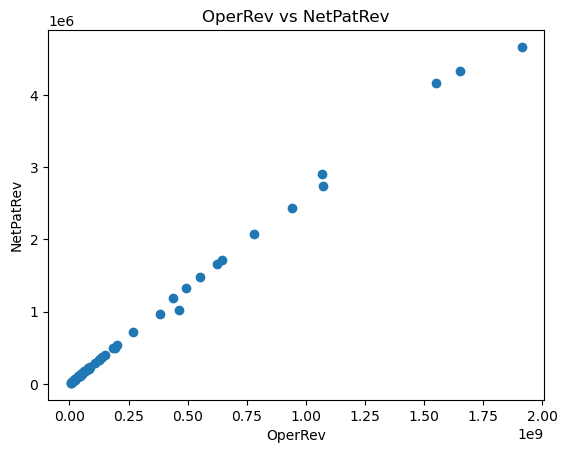

In [24]:
plt.scatter(merged['OperRev'], merged['NetPatRev'])
plt.title('OperRev vs NetPatRev')
plt.xlabel('OperRev')
plt.ylabel('NetPatRev')
plt.show()

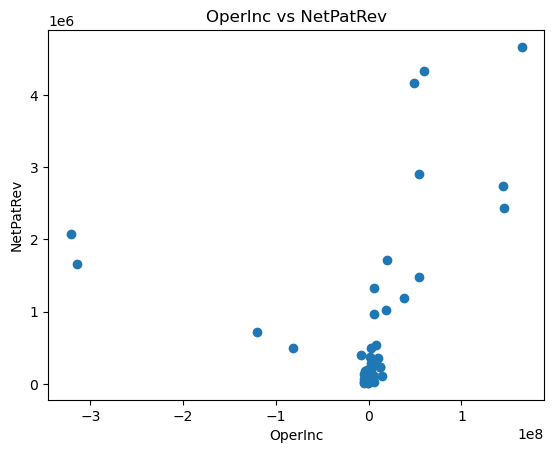

In [26]:
plt.scatter(merged['OperInc'], merged['NetPatRev'])
plt.title('OperInc vs NetPatRev')
plt.xlabel('OperInc')
plt.ylabel('NetPatRev')
plt.show()

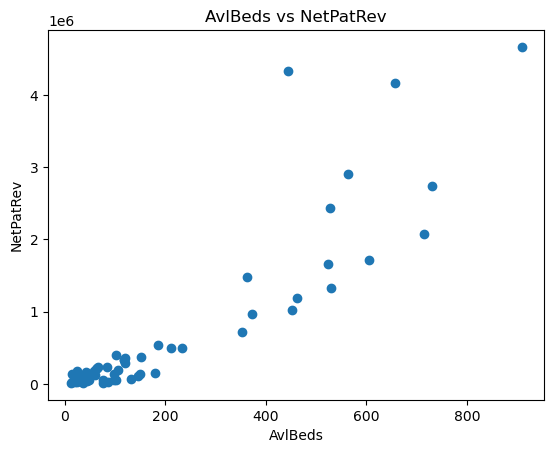

In [28]:
plt.scatter(merged['AvlBeds'], merged['NetPatRev'])
plt.title('AvlBeds vs NetPatRev')
plt.xlabel('AvlBeds')
plt.ylabel('NetPatRev')
plt.show()

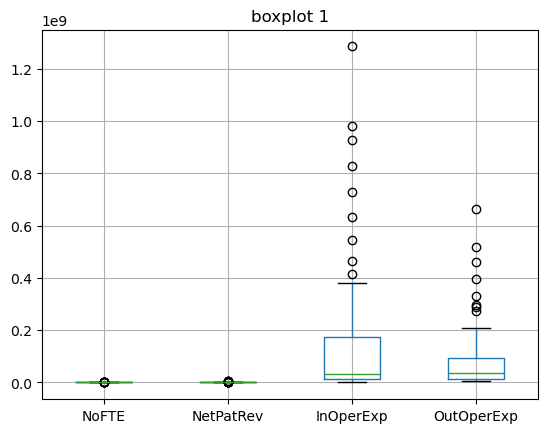

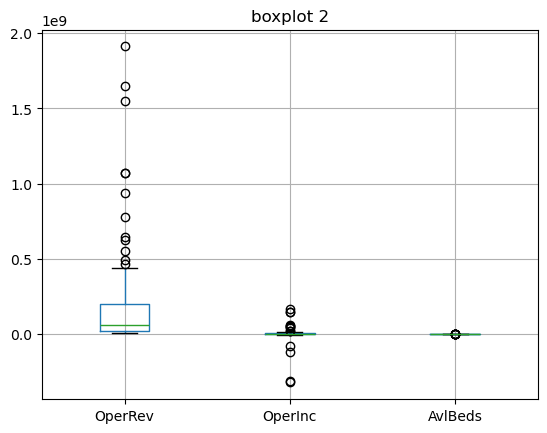

In [32]:
# boxplots to check outliers
merged[['NoFTE','NetPatRev','InOperExp','OutOperExp']].boxplot()  # first set
plt.title('boxplot 1')  # title
plt.show()  # check
merged[['OperRev','OperInc','AvlBeds']].boxplot()  # second set
plt.title('boxplot 2')  # title
plt.show()  # check

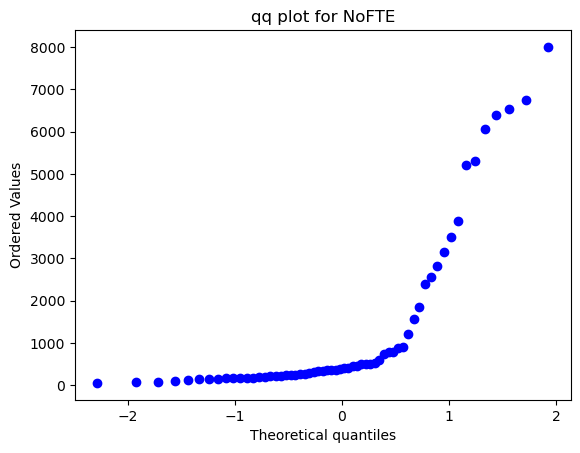

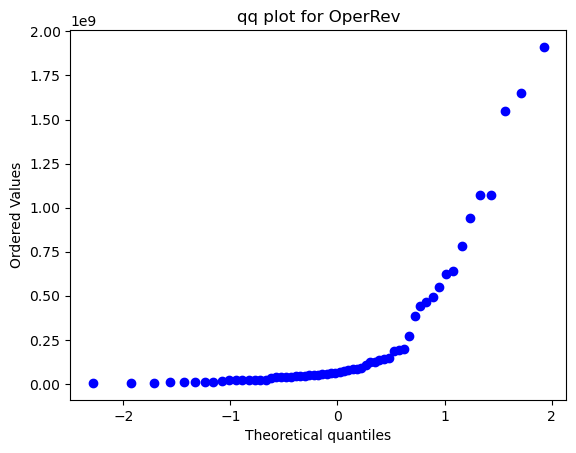

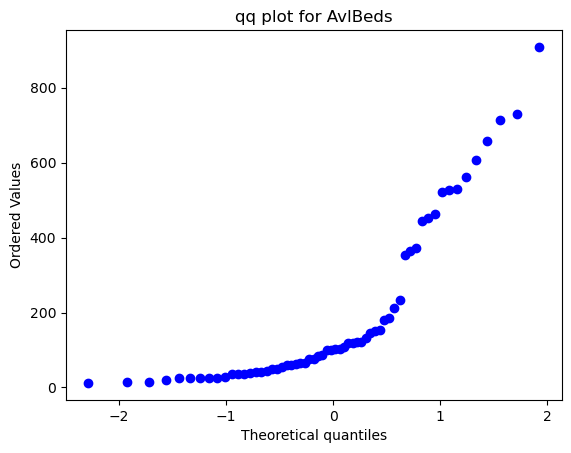

In [40]:
# qq plots for normality
sts.probplot(merged['NoFTE'], dist="norm", plot=plt)  # qq plot 1
plt.title("qq plot for NoFTE")  # label
plt.show()  # check

sts.probplot(merged['OperRev'], dist="norm", plot=plt)  # qq plot 2
plt.title("qq plot for OperRev")
plt.show() #check

sts.probplot(merged['AvlBeds'], dist="norm", plot=plt)  # qq plot 3
plt.title("qq plot for AvlBeds")
plt.show() #check

In [42]:
# shapiro test for normality
print("shapiro test for NoFTE:", sts.shapiro(merged['NoFTE']))  # test 1
print("shapiro test for OperRev:", sts.shapiro(merged['OperRev']))  # test 2
print("shapiro test for AvlBeds:", sts.shapiro(merged['AvlBeds']))  # test 3

shapiro test for NoFTE: ShapiroResult(statistic=nan, pvalue=nan)
shapiro test for OperRev: ShapiroResult(statistic=nan, pvalue=nan)
shapiro test for AvlBeds: ShapiroResult(statistic=nan, pvalue=nan)
